In [131]:
import random 
import numpy as np
import matplotlib.pyplot as plt
TOTAL_POP = 100

In [68]:
MSG = "PYTHON"
TARGET = ' '.join(format(ord(m), 'b') for m in MSG)

In [69]:
GENES = '01 '
def chromosome():
    global TARGET
    return [mutation() for t in range(len(TARGET))]
def mutation():
    global GENES
    return random.choice(GENES)

In [70]:
def DNA_mismatch(population):
    global TARGET
    fitness = []
    for p in population:
        fit = 0
        for i in range(len(TARGET)):
            if p[i] != TARGET[i]:
                fit += 1
        fitness.append(fit)
    return list(zip(population,fitness))

In [77]:
def CrossOver(p1,p2):
    child_chromosome = []
    for i in range(len(TARGET)):
        prob = random.random()
        if prob <0.45:
            child_chromosome.append(p1[i])
        elif prob <0.90:
            child_chromosome.append(p2[i])
        else:
            child_chromosome.append(mutation())
    return child_chromosome

In [78]:
def CrossOverWithoutMutation(p1,p2):
    child_chromosome = []
    for i in range(len(TARGET)):
        prob = random.random()
        if prob <0.5:
            child_chromosome.append(p1[i])
        else :
            child_chromosome.append(p2[i])
    return child_chromosome

In [111]:
def onePointCrossOver(p1,p2):
    global TARGET
    child_chromosome_1,child_chromosome_2= p1,p2
    shuffle_index = np.random.choice(np.arange(0,len(TARGET)))
    for s in range(shuffle_index):
        child_chromosome_1[s],child_chromosome_2[s] = child_chromosome_2[s],child_chromosome_1[s]
    return [child_chromosome_1,child_chromosome_2]

In [124]:
def twoPointCrossOver(p1,p2):
    global TARGET
    child_chromosome_1,child_chromosome_2= p1,p2
    shuffle_index = random.choice(np.arange(0,len(TARGET)))
    shuffle_after_index = random.randint(shuffle_index,len(TARGET))
    for s in range(shuffle_index,shuffle_after_index):
        child_chromosome_1[s],child_chromosome_2[s] = child_chromosome_2[s],child_chromosome_1[s]
    return [child_chromosome_1,child_chromosome_2]

In [127]:
def uniformCrossOver(p1,p2):
    global TARGET
    child_chromosome_1,child_chromosome_2= p1,p2
    for index in range(len(TARGET)):
        p = random.random()
        if p < 0.8:
            child_chromosome_1[index],child_chromosome_2[index] = child_chromosome_2[index],child_chromosome_1[index]
        else:
            child_chromosome_1[index],child_chromosome_2[index] = mutation(),mutation()
    return [child_chromosome_1,child_chromosome_2]

In [76]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found or generation == 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = CrossOver(population[p1][0],population[p2][0])
            new_generation.append(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :> 111 10  1 1010111001 000   1  1 10001   1 0 11  : Error 24 in Generation :  1
Children :> 10 001111111 11010 110111 01011 0001111 000 1 1 : Error 20 in Generation :  2
Children :> 10 001111111 11010 110111 01011 0001111 000 1 1 : Error 20 in Generation :  3
Children :> 00 000010 10001 1 10010 10 1001 001111101 00110 : Error 16 in Generation :  4
Children :>  0100 0 1010011 1010100  0111   10 1101 1011111 : Error 13 in Generation :  5
Children :> 1 1100111010 01 0010100 1000001 100111101001110 : Error 10 in Generation :  6
Children :> 10 000011010001 1010100 1010001 100 111 1001110 : Error  7 in Generation :  7
Children :> 10 0000 1011 0  0010100 1001000 1001111 1000110 : Error  5 in Generation :  8
Children :> 10 0000 1011001 1010100 1001000 1001 11 1001110 : Error  2 in Generation :  9
Children :> 10 0000 1011001 1010100 1001000 1001111 1001110 : Error  1 in Generation : 10
Children :> 1010000 1011001 1010100 1001000 1001111 1001110 : Error  0 in Generation : 11


In [105]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found and generation <=200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = CrossOverWithoutMutation(population[p1][0],population[p2][0])
            new_generation.append(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :>  110  1100110011 0 010001   1000 00 101  1 11 0 : Error 23 in Generation :  1
Children :>  110  1100110011 0 010001   1000 00 101  1 11 0 : Error 23 in Generation :  2
Children :> 0010 00010011  10 10100 100100000 1 1110  01100 : Error 19 in Generation :  3
Children :> 100 1 001 01001 00101000100100  1  1111101 10 0 : Error 18 in Generation :  4
Children :> 10 0010 1001001 10 01 01100 001 1011101 0  1010 : Error 14 in Generation :  5
Children :> 1110000 0 1111111010100 1001000 1000 11 1011110 : Error  9 in Generation :  6
Children :> 101 000010 1001 1011100 1001000 10 1111 10 1010 : Error  7 in Generation :  7
Children :> 1010000  011101 1010101 1001000 1001101 1011110 : Error  5 in Generation :  8
Children :> 0010000 101 001 1010100 1001000 1001111 00 1110 : Error  4 in Generation :  9
Children :> 1010000 0011001 101010011001000 1001111 1001110 : Error  2 in Generation : 10
Children :> 1010000 1011001 1010100 10 1000 1001111 1001110 : Error  1 in Generation : 11
Children :

In [106]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = CrossOverWithoutMutation(population[p1][0],population[p2][0])
            new_generation.append(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :> 10 00 0 0011010 1 0000 11 0 011 1110110 1 01100 : Error 20 in Generation :  1
Children :> 10 00 0 0011010 1 0000 11 0 011 1110110 1 01100 : Error 20 in Generation :  2
Children :> 1000000 1 11000 1 01 0  10  000  0 0110 1 01100 : Error 16 in Generation :  3
Children :> 1000000 1 11000 1 01 0  10  000  0 0110 1 01100 : Error 16 in Generation :  4
Children :>   11000  001001 100000 01001000 000 111 1001100 : Error 12 in Generation :  5
Children :> 1 00000 101000 11010 0  1001001 1001101 1  1110 : Error 11 in Generation :  6
Children :> 1 00100 1011001 10 0100 100 0001 001111 10011 0 : Error  8 in Generation :  7
Children :> 1010000 1110001 101110  1001001 1101111 1001110 : Error  6 in Generation :  8
Children :> 1000000 1011000 101010  1001000 1000111 1001110 : Error  4 in Generation :  9
Children :> 10 0000 101100  1010100 1001000 1001111 1001110 : Error  2 in Generation : 10
Children :> 1010000 1011001 1010100 1001010 1001111 1001110 : Error  1 in Generation : 11
Children :

In [110]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = onePointCrossOver(population[p1][0],population[p2][0])
            new_generation.extend(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :> 101 11010001110010  1 0 10011011 00011  10   10 : Error 22 in Generation :  1
Children :> 101 1 1 0   001 00   00 10011011 00011  10   10 : Error 21 in Generation :  2
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  3
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  4
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  5
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  6
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  7
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  8
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation :  9
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation : 10
Children :> 001 1 0 10011 0 001011  100110101100100 10 11 0 : Error 20 in Generation : 11
Children :

In [123]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = twoPointCrossOver(population[p1][0],population[p2][0])
            new_generation.extend(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :> 0011010 110 0011 0101 00101111111  111  1 11010 : Error 21 in Generation :  1
Children :>  11  00010110 1 010 00100 010011100 11110101000 : Error 23 in Generation :  2
Children :> 11 0 0000 11111 11 010101 110001000101101101 0  : Error 22 in Generation :  3
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation :  4
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation :  5
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation :  6
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation :  7
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation :  8
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation :  9
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation : 10
Children :> 11 0 0000011010 11 010101111000 010101 0100011  : Error 20 in Generation : 11
Children :

In [129]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])
error_rate = []
generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    error_rate.append(population[0][1])
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = uniformCrossOver(population[p1][0],population[p2][0])
            new_generation.extend(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1
    

Children :> 00  11  10010 1111 010001  1 0101000 011101110  : Error 24 in Generation :  1
Children :> 0 1011110001 01 1011111 10    01100110001 010 1 : Error 24 in Generation :  2
Children :>  110000 100 11011 1111      001 11001 101010101 : Error 25 in Generation :  3
Children :>  111 0011110010 1 1 00  1111   0101111 101 1111 : Error 26 in Generation :  4
Children :>  111  011 101 1100000   10 00   1 0 011 0100101 : Error 28 in Generation :  5
Children :> 0 0110000  001 11110 1 0 010  11 00    10 10100 : Error 36 in Generation :  6
Children :>     1 0110 101 101 1  00  0  100 010  1110  010 : Error 33 in Generation :  7
Children :> 110 0   0  1001111 10110110 1 01 00  1  11 0100 : Error 29 in Generation :  8
Children :>   00 11 01 1   000 0 010010   1 01 1 11 11 011  : Error 32 in Generation :  9
Children :>  00 0100011 0100 011110101011 1 10 0 1101  01 1 : Error 29 in Generation : 10
Children :>  1  1 011101101 0 000 11 11  0001   11 0   10   : Error 34 in Generation : 11
Children :

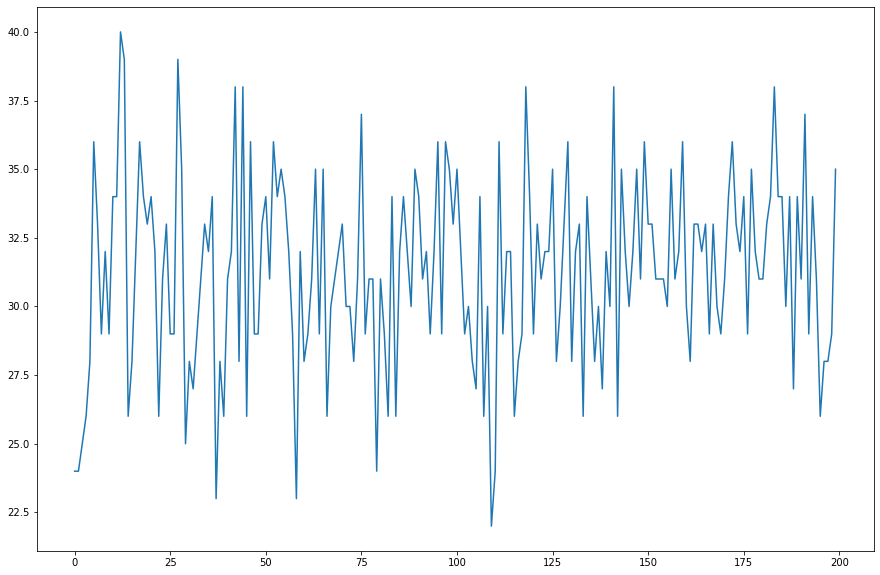

In [143]:
generation = [x for x in range(200)]
plt.figure(figsize=(15,10))
plt.plot(generation,error_rate)